In [1]:
#The project is detecting the existence of hepatitis 
#Supervised Task 
#Classification Problem
# Data source : https://archive.ics.uci.edu/ml/datasets/hepatitis  

age                  0
sex                  0
steroid              1
antivirals           0
fatigue              1
malaise              1
anorexia             1
liver_big           10
liver_firm          11
spleen_palpable    125
spiders              5
ascites              5
varices              5
bilirubin            6
alk_phosphate       29
sgot                 4
albumin             16
protime             67
histology            0
class                0
dtype: int64


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,85.000000,18.00000,4.000000,61.852273,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.900000,135.000000,42.00000,3.500000,61.852273,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.700000,96.000000,32.00000,4.000000,61.852273,0,1
3,31,0,1.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.700000,46.000000,52.00000,4.000000,80.000000,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,105.325397,200.00000,4.000000,61.852273,0,1
5,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.900000,95.000000,28.00000,4.000000,75.000000,0,1
6,51,0,0.0,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.427517,105.325397,85.89404,3.817266,61.852273,0,0
7,23,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,105.325397,85.89404,3.817266,61.852273,0,1
8,39,0,1.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.700000,105.325397,48.00000,4.400000,61.852273,0,1
9,30,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,105.325397,120.00000,3.900000,61.852273,0,1


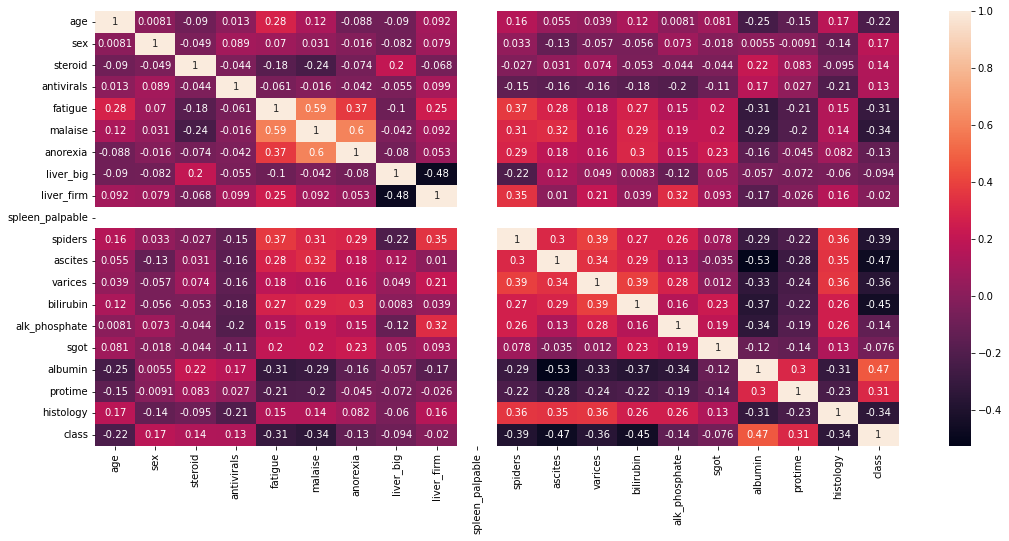

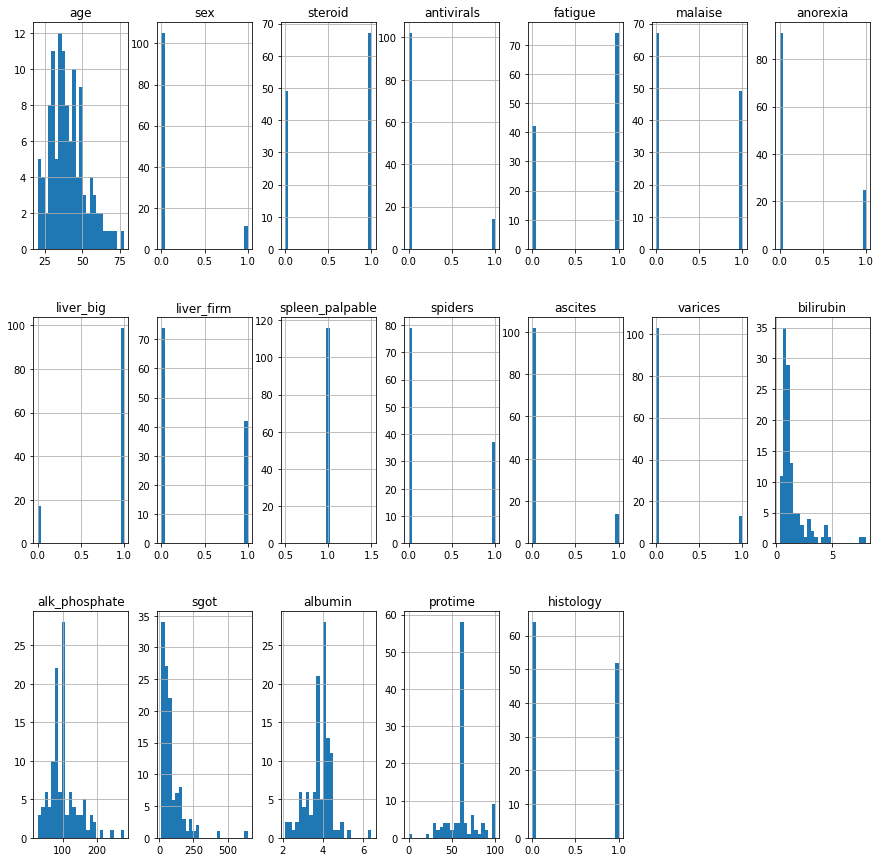

In [3]:
#Libraries importing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
np.random.seed(10)

#Uploading Dataset
dataset=pd.read_csv("dataset/hepatitis.csv")
dataset.head(20)


# A) Data Exploring

# 1) Encoding Binary Features
dataset["sex"]=dataset["sex"].apply(lambda x: 1 if x=="male" else (0 if x=="female" else np.nan))
dataset["steroid"]=dataset["steroid"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["antivirals"]=dataset["antivirals"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["fatigue"]=dataset["fatigue"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["malaise"]=dataset["malaise"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["anorexia"]=dataset["anorexia"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["liver_big"]=dataset["liver_big"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["liver_firm"]=dataset["liver_firm"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["spleen_palpable"]=dataset["spleen_palpable"].apply(lambda x: 1 if x==True else (0 if x=="B" else np.nan))
dataset["spiders"]=dataset["spiders"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["ascites"]=dataset["ascites"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["varices"]=dataset["varices"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["histology"]=dataset["histology"].apply(lambda x: 1 if x==True else (0 if x==False else np.nan))
dataset["class"]=dataset["class"].apply(lambda x: 1 if x=="live" else (0 if x=="die" else np.nan))

# 2) Missing Values discovering 
count=dataset.isnull().sum()
print(count)
# 3) Dealing with Missing Values
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(strategy="mean") 
dataset[["bilirubin"]]=imp1.fit_transform(dataset[["bilirubin"]])
dataset[["alk_phosphate"]]=imp1.fit_transform(dataset[["alk_phosphate"]])
dataset[["sgot"]]=imp1.fit_transform(dataset[["sgot"]])
dataset[["albumin"]]=imp1.fit_transform(dataset[["albumin"]])
dataset[["protime"]]=imp1.fit_transform(dataset[["protime"]])
dataset.head(10)

from sklearn.impute import SimpleImputer
from numpy import nan
imp2 = SimpleImputer(strategy="most_frequent") 
dataset[["steroid"]]=imp2.fit_transform(dataset[["steroid"]])
dataset[["antivirals"]]=imp2.fit_transform(dataset[["antivirals"]])
dataset[["fatigue"]]=imp2.fit_transform(dataset[["fatigue"]])
dataset[["malaise"]]=imp2.fit_transform(dataset[["malaise"]])
dataset[["anorexia"]]=imp2.fit_transform(dataset[["anorexia"]])
dataset[["liver_big"]]=imp2.fit_transform(dataset[["liver_big"]])
dataset[["liver_firm"]]=imp2.fit_transform(dataset[["liver_firm"]])
dataset[["spleen_palpable"]]=imp2.fit_transform(dataset[["spleen_palpable"]])
dataset[["spiders"]]=imp2.fit_transform(dataset[["spiders"]])
dataset[["ascites"]]=imp2.fit_transform(dataset[["ascites"]])
dataset[["varices"]]=imp2.fit_transform(dataset[["varices"]])
dataset[["histology"]]=imp2.fit_transform(dataset[["histology"]])
dataset.head(10)

# 4) Outliers Discovering by descibing
dataset.describe()



# 6) Features corellation Matrix
#Libraries importing 
import seaborn as sb
import matplotlib.pyplot as plt
#corellation Matrix before dropping
plt.figure(figsize=(18,8))
corr=dataset.corr()
sb.heatmap(corr,annot=True)


# 7) Dataset splitting
features=dataset.drop(["class"],axis=1)
target=dataset["class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,stratify=target,random_state=10)

# 5) Features distribution
x_train.hist(figsize=(15,15),layout=(3,7),bins=25)

pd.set_option('display.max_colwidth', None)
pd.set_option("max_rows", None)

dataset.head(10)

In [4]:
# 1)  K-Nearest Neighbors Classifier with PCA

#Libraries importing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Dataset splitting
features=dataset.drop(["class"],axis=1)
target=dataset["class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,stratify=target,random_state=1)


#Defining in instance for Standerizing
std=StandardScaler()

#Defining an instance for PCA DR Algorithm
pca=PCA(n_components=0.95)

#Defining an instance for K-Nearest Neighbor Classifiers
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

#Standrizing Process
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

#Applying Feature extraction using PCA
features_reduced=pca.fit_transform(x_train_std)
x_test=pca.transform(x_test_std)

#Creating a Model with train and test
model=knn.fit(features_reduced,y_train)
y_predict=model.predict(x_test)

#Evaluate the model
print("The Accuracy of the Model is:",accuracy_score(y_test,y_predict))
print("The Precision of the Model is:",precision_score(y_test,y_predict))
print("The Recall of the Model is:",recall_score(y_test,y_predict))
print("The F1 Score of the Model is:",f1_score(y_test,y_predict))

The Accuracy of the Model is: 0.9743589743589743
The Precision of the Model is: 0.96875
The Recall of the Model is: 1.0
The F1 Score of the Model is: 0.9841269841269841


In [9]:
# 2) AdaBoost Classifier

#import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Dataset splitting
features=dataset.drop(["class"],axis=1)
target=dataset["class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,stratify=target,random_state=10)

#identifing the maximum precision
max_p=0.93
#identifing the range of random state
np.random.seed(50)
n=np.random.randint(300,600,5)
#identifing the range of learning rate
le=np.random.random(5)+0.01

#Defining an instance for AdaBoost Classifier
adb=AdaBoostClassifier(n_estimators=409,random_state=50,learning_rate=0.7818939948397136)

#Creating a Model with train and test
model= adb.fit(x_train,y_train)
y_predict=model.predict(x_test)

#Evaluate the model
print("The Accurecy of the Model is:",accuracy_score(y_test,y_predict))
print("The Precision of the Model is:",precision_score(y_test,y_predict))
print("The Recall of the Model is:",recall_score(y_test,y_predict))
print("The F1 Score of the Model is:",f1_score(y_test,y_predict))


# #Tell me what is the feature do i delete to imporove precision
# from sklearn.feature_selection import RFECV
# rf=RFECV(estimator=adb,step=1,scoring="accuracy")
# #fitting and transformation
# rf.fit(x_train,y_train)
# rf.transform(x_train)
# #the result bu nothing changed
# print(rf.support_)


The Accurecy of the Model is: 0.8717948717948718
The Precision of the Model is: 0.9333333333333333
The Recall of the Model is: 0.9032258064516129
The F1 Score of the Model is: 0.9180327868852459
